In [61]:
#!pip install seaborn
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import requests
import json
import seaborn as sns
import calendar
#from config import gkey
#from config import omdb_api_key

In [45]:
# File to Load
crime_data_to_load = "Resources/crime_09_20_clean_dupsdeleted.csv"



In [46]:
# Read  Data File and store into Pandas DataFrames
crime_data = pd.read_csv(crime_data_to_load)

#print data frame
crime_data.head()


C:\Users\betsy\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12


In [100]:
#Consolidated dataframe headings to match what's going on in 2020 with robberies and burglaries

crime_data_consolidated_df = crime_data.replace(
    {"BURGLARY-NONRES": "BURGLARY", "BURGLARY-RESIDENCE": "BURGLARY", "ROBBERY-COMMERCIAL" : "ROBBERY",
     "ROBBERY-PEDESTRIAN": "ROBBERY", "ROBBERY-RESIDENCE" : "ROBBERY"})
crime_data_consolidated_df

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [47]:
#Get data frame for just the year 2020

crime_data_2020 = crime_data.loc[(crime_data["occur_year"] == 2020)]
crime_data_2020

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
342347,203660108,12/31/2020,1:15,1974 SYLVAN RD SW,AGG ASSAULT,Sylvan Hills,33.700432,-84.418128,2020,12
342348,203660240,12/31/2020,0:00,361 OLIVER ST NW,AUTO THEFT,English Avenue,33.764633,-84.415338,2020,12
342349,203660279,12/31/2020,3:50,800 WEST MARIETTA ST NW,LARCENY-NON VEHICLE,English Avenue,33.778925,-84.412613,2020,12
342350,203660299,12/31/2020,4:15,1054 RIDGE AVE SW,ROBBERY,Peoplestown,33.726336,-84.391717,2020,12
342351,203660335,12/31/2020,3:00,2284 CHESHIRE BRIDGE RD NE,LARCENY-FROM VEHICLE,Lindridge/Martin Manor,33.817488,-84.352555,2020,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.753770,-84.474050,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.739900,-84.404880,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.765530,-84.349340,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.763910,-84.374890,2020,1


In [101]:
#Get data frame for just the year 2019

crime_data_2019 = crime_data_consolidated_df.loc[(crime_data["occur_year"] == 2019)]
crime_data_2019

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
24837,190040924,1/1/2019,1700,3500 PEACHTREE RD NE,LARCENY-NON VEHICLE,North Buckhead,33.85302,-84.36278,2019,1
24838,190040861,1/1/2019,1100,868 JOESEPH E BOONE,LARCENY-FROM VEHICLE,Center Hill,33.77725,-84.46072,2019,1
24839,190371588,1/1/2019,1240,2909 CAMPBELLTON RD SW,BURGLARY,Southwest,33.69869,-84.48265,2019,1
24840,190890742,1/1/2019,800,2430 CHESHIRE BRIDGE RD NE,BURGLARY,Lindridge/Martin Manor,33.82149,-84.35161,2019,1


In [48]:
crime_duplicates = crime_data_2020[crime_data_2020.duplicated(["offense_id","occur_year"])]
crime_duplicates

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
349607,202720096,9/28/2020,1:10,1222 W MARIETTA ST NW,ROBBERY,Knight Park/Howell Station,33.78604,-84.42737,2020,9


In [92]:
#group by month 2020
crime_type = crime_data_2020.groupby("occur_month")
crime_type.head()

crime_count = crime_type["offense_id"].count()
crime_count

#crime_count.sort_values(by="occur_month")

occur_month
1     2184
2     1776
3     1574
4     1130
5     1339
6     1638
7     1625
8     1802
9     1622
10    2314
11    2430
12    2467
Name: offense_id, dtype: int64

In [102]:
#group by month 2019
crime_type_2019 = crime_data_2019.groupby("occur_month")
crime_type_2019.head()

crime_count_2019 = crime_type_2019["offense_id"].count()
crime_count_2019

occur_month
1     2012
2     1644
3     1610
4     1854
5     2336
6     2130
7     2341
8     2232
9     2169
10    2215
11    2101
12    2198
Name: offense_id, dtype: int64

In [50]:
#2020
crime_count = crime_count.reset_index()
crime_count
# crime_count
crime_count['occur_month'] = crime_count['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_count

,occur_month,offense_id
0,Jan,2184
1,Feb,1776
2,Mar,1574
3,Apr,1130
4,May,1339
5,Jun,1638
6,Jul,1625
7,Aug,1802
8,Sep,1622
9,Oct,2314


In [103]:
crime_count_2019 = crime_count_2019.reset_index()
crime_count_2019
# crime_count
crime_count_2019['occur_month'] = crime_count_2019['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_count_2019

,occur_month,offense_id
0,Jan,2012
1,Feb,1644
2,Mar,1610
3,Apr,1854
4,May,2336
5,Jun,2130
6,Jul,2341
7,Aug,2232
8,Sep,2169
9,Oct,2215


In [ ]:
#2020
crime_count = crime_count.reset_index()
crime_month_id = crime_count[["occur_month","offense_id"]]

#crime_count = crime_count.reset_index()
crime_month_id =  crime_month_id.set_index("occur_month")
crime_month_id

In [104]:
#2019
crime_count_2019 = crime_count_2019.reset_index()
crime_month_id_2019 = crime_count_2019[["occur_month","offense_id"]]

#crime_count = crime_count.reset_index()
crime_month_id_2019=  crime_month_id_2019.set_index("occur_month")
crime_month_id_2019

,offense_id
occur_month,
Jan,2012
Feb,1644
Mar,1610
Apr,1854
May,2336
Jun,2130
Jul,2341
Aug,2232
Sep,2169


<IPython.core.display.Javascript object>


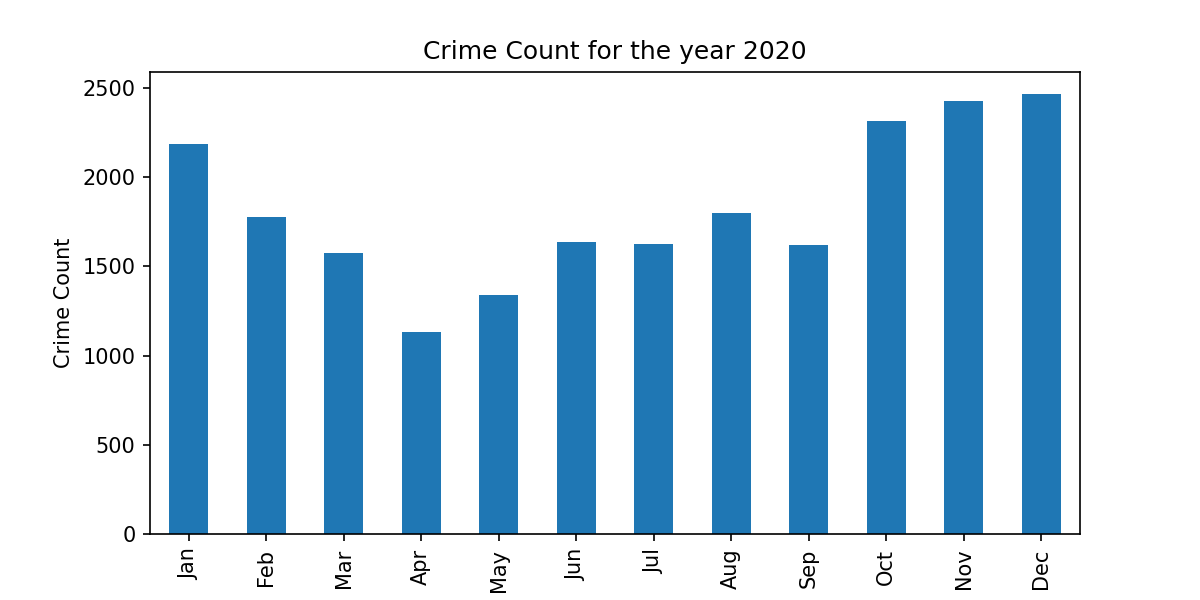

In [52]:
#2020
crime_month_id.plot(kind="bar", figsize=(8,4),legend =False)

plt.title("Crime Count for the year 2020")
plt.ylabel("Crime Count")
plt.xlabel("Occur Month")

plt.show()
#plt.tight_layout()

<IPython.core.display.Javascript object>


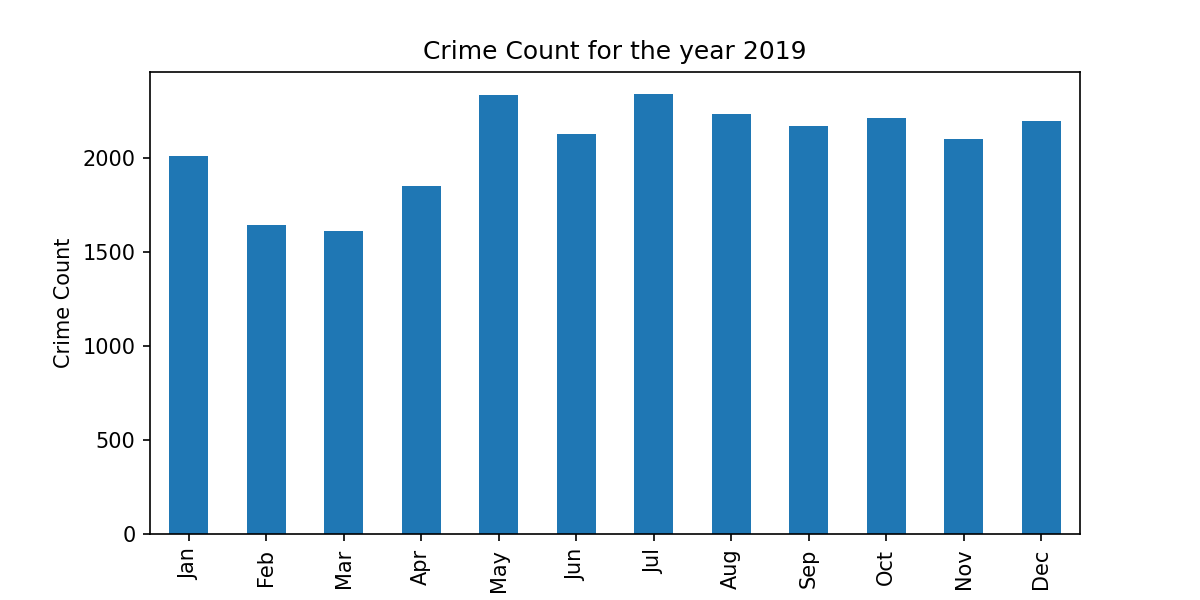

In [96]:
#2019
crime_month_id_2019.plot(kind="bar", figsize=(8,4),legend =False)

plt.title("Crime Count for the year 2019")
plt.ylabel("Crime Count")
plt.xlabel("Occur Month")

plt.show()
#plt.tight_layout()

In [53]:
#Group by type 2020
crime_type = crime_data_2020.groupby(["UC2_Literal"])
crime_type.head()

#Get month data
crime_month = crime_type["offense_id"].count()
crime_month


UC2_Literal
AGG ASSAULT             2337
AUTO THEFT              3226
BURGLARY                2089
HOMICIDE                 146
LARCENY-FROM VEHICLE    8584
LARCENY-NON VEHICLE     4628
MANSLAUGHTER               2
ROBBERY                  889
Name: offense_id, dtype: int64

<IPython.core.display.Javascript object>


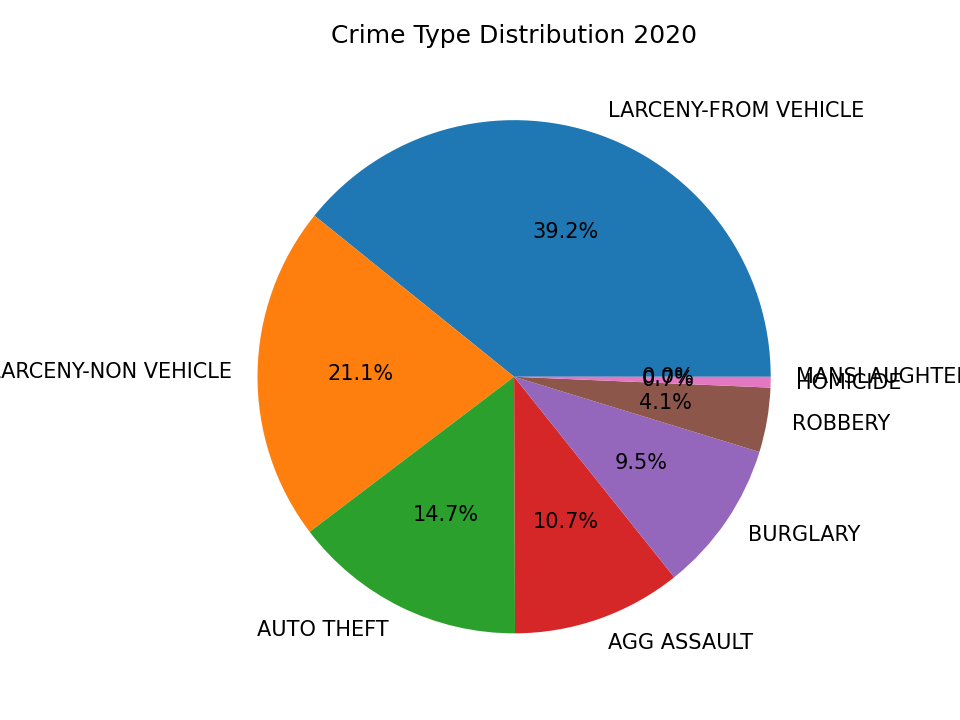

In [89]:
crime_pie = crime_data_2020["UC2_Literal"].value_counts()
crime_pie

crime_pie.plot(kind="pie", autopct='%1.1f%%',legend = False)
#crime_pie.plot(kind="pie", y = "offense_id", autopct='%1.1f%%',
              #startangle=140, shadow=True, legend = False)
#plt.axis("equal")

plt.title("Crime Type Distribution 2020")
plt.ylabel("")
plt.show()
plt.tight_layout()

In [77]:
#Group by type
crime_type_month = crime_data_2020.groupby(["occur_month","UC2_Literal"])
crime_type_group = crime_type_month["offense_id"].count()
crime_type_group

occur_month  UC2_Literal         
1            AGG ASSAULT              128
             AUTO THEFT               270
             BURGLARY                 202
             HOMICIDE                   5
             LARCENY-FROM VEHICLE     944
                                     ... 
12           BURGLARY                 161
             HOMICIDE                  16
             LARCENY-FROM VEHICLE    1177
             LARCENY-NON VEHICLE      423
             ROBBERY                   73
Name: offense_id, Length: 85, dtype: int64

In [78]:
crime_type_month_df = pd.DataFrame(crime_type_group).reset_index()
crime_type_month_df 

crime_type_month_df['occur_month'] = crime_type_month_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_df

,occur_month,UC2_Literal,offense_id
0,Jan,AGG ASSAULT,128
1,Jan,AUTO THEFT,270
2,Jan,BURGLARY,202
3,Jan,HOMICIDE,5
4,Jan,LARCENY-FROM VEHICLE,944
...,...,...,...
80,Dec,BURGLARY,161
81,Dec,HOMICIDE,16
82,Dec,LARCENY-FROM VEHICLE,1177
83,Dec,LARCENY-NON VEHICLE,423


<IPython.core.display.Javascript object>


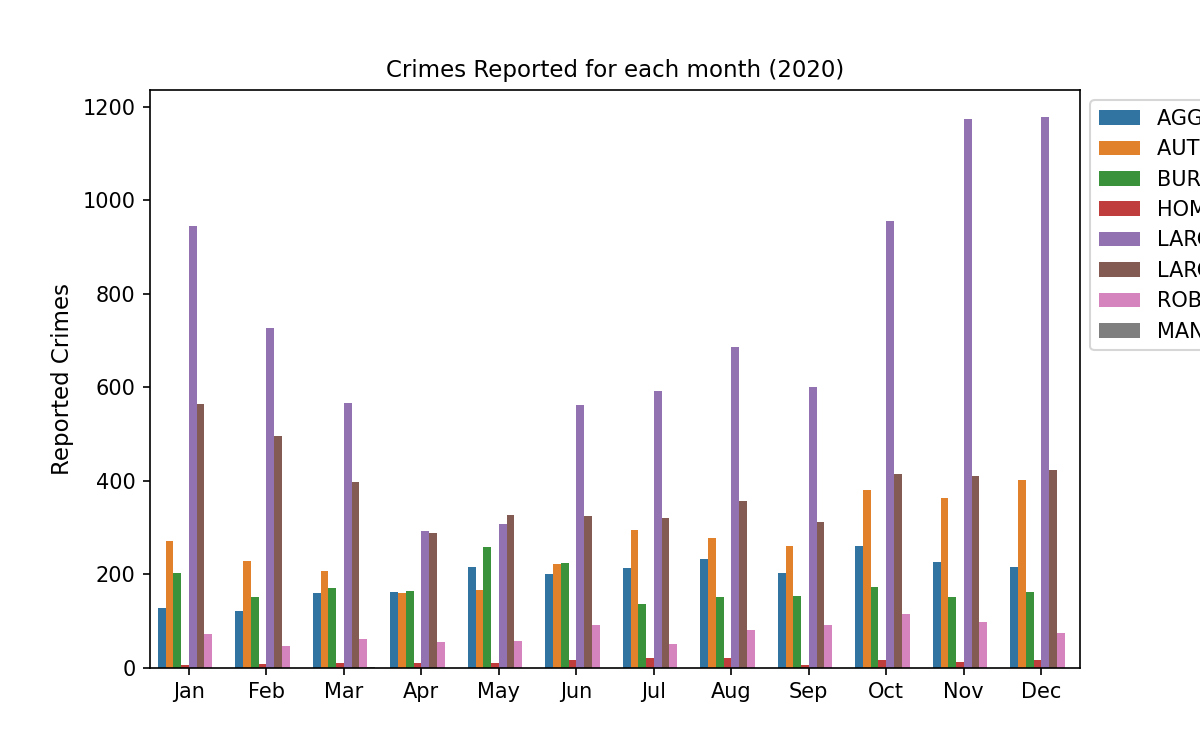

Text(0.5, 0, '')

In [88]:
#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'UC2_Literal', data = crime_type_month_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2020)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [105]:
#2019
#Group by type
crime_type_month_2019 = crime_data_2019.groupby(["occur_month","UC2_Literal"])
crime_type_group_2019 = crime_type_month_2019["offense_id"].count()
crime_type_group_2019

occur_month  UC2_Literal         
1            AGG ASSAULT             109
             AUTO THEFT              275
             BURGLARY                243
             HOMICIDE                 10
             LARCENY-FROM VEHICLE    824
                                    ... 
12           BURGLARY                217
             HOMICIDE                  6
             LARCENY-FROM VEHICLE    927
             LARCENY-NON VEHICLE     512
             ROBBERY                  85
Name: offense_id, Length: 87, dtype: int64

In [106]:
#2019
crime_type_month_2019_df = pd.DataFrame(crime_type_group_2019).reset_index()
crime_type_month_2019_df 

crime_type_month_2019_df['occur_month'] = crime_type_month_2019_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_2019_df

,occur_month,UC2_Literal,offense_id
0,Jan,AGG ASSAULT,109
1,Jan,AUTO THEFT,275
2,Jan,BURGLARY,243
3,Jan,HOMICIDE,10
4,Jan,LARCENY-FROM VEHICLE,824
...,...,...,...
82,Dec,BURGLARY,217
83,Dec,HOMICIDE,6
84,Dec,LARCENY-FROM VEHICLE,927
85,Dec,LARCENY-NON VEHICLE,512


<IPython.core.display.Javascript object>


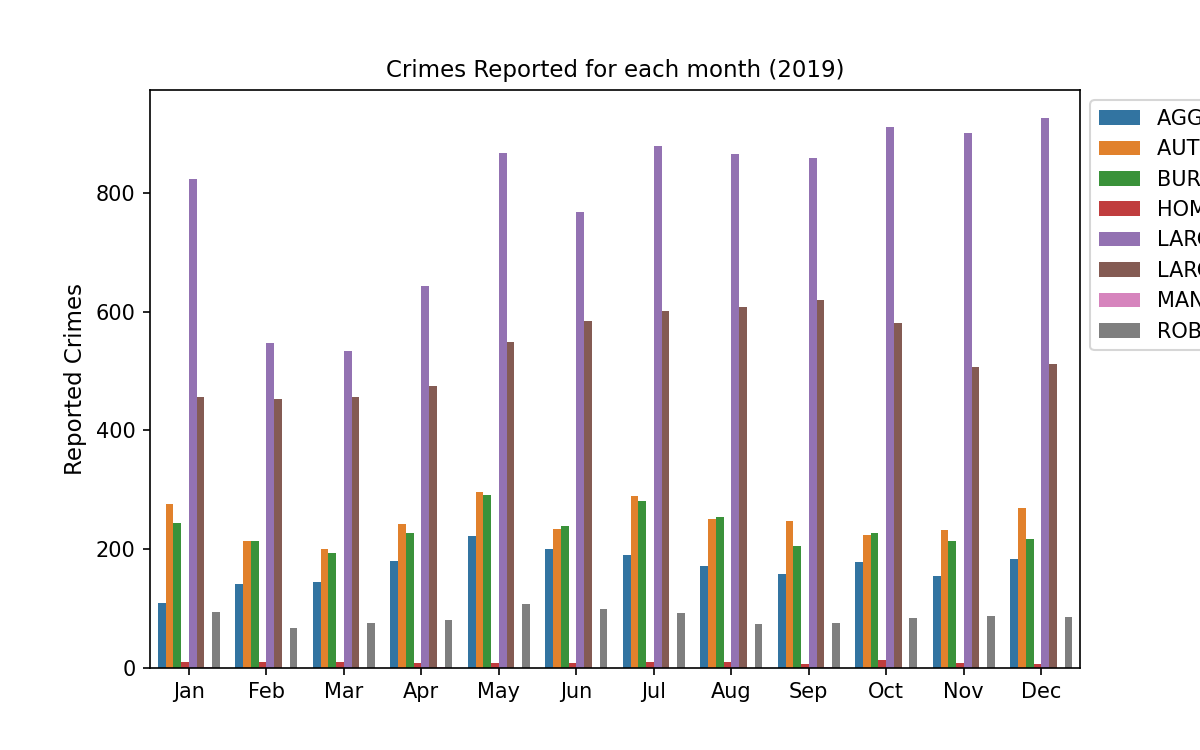

Text(0.5, 0, '')

In [107]:
#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'UC2_Literal', data = crime_type_month_2019_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month (2019)", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")

In [111]:
#Month vs Month for year 2019 - 2020
crime_2019_2020 = crime_data_consolidated_df.loc[(crime_data["occur_year"] == 2019) | (crime_data["occur_year"] == 2020)]
crime_2019_2020

,offense_id,occur_date,occur_time,location,UC2_Literal,neighborhood,lat,long,occur_year,occur_month
0,193651657,12/31/2019,1458,1388 LA FRANCE ST NE,LARCENY-NON VEHICLE,Edgewood,33.76053,-84.34220,2019,12
1,193651031,12/31/2019,1300,443 MORELAND AVE SE,LARCENY-NON VEHICLE,Ormewood Park,33.74179,-84.34973,2019,12
2,193650870,12/31/2019,1200,2711 METROPOLITAN PKWY SW,LARCENY-NON VEHICLE,Hammond Park,33.68092,-84.40814,2019,12
3,193651019,12/31/2019,1300,969 MARIETTA ST NW,LARCENY-NON VEHICLE,Marietta Street Artery,33.77828,-84.40910,2019,12
4,193651039,12/31/2019,1300,3070 BOLLING WAY NE,LARCENY-NON VEHICLE,Buckhead Village,33.83888,-84.37995,2019,12
...,...,...,...,...,...,...,...,...,...,...
364243,200011298,1/1/2020,14:45,2630 MARTIN L KING JR DR SW,AUTO THEFT,Harland Terrace,33.75377,-84.47405,2020,1
364244,200011823,1/1/2020,20:00,540 HUMPHRIES ST SW,AUTO THEFT,Mechanicsville,33.73990,-84.40488,2020,1
364245,200020105,1/1/2020,21:45,1174 EUCLID AVE NE,AUTO THEFT,Inman Park,33.76553,-84.34934,2020,1
364246,200020704,1/1/2020,20:00,383 RALPH MCGILL BLVD NE,AUTO THEFT,Old Fourth Ward,33.76391,-84.37489,2020,1


In [112]:
#2019-2020
#Group by year for 2019 and 2020 for months
crime_type_month_2019_2020 = crime_2019_2020.groupby(["occur_year","occur_month"])
crime_type_group_2019_2020 = crime_type_month_2019_2020["offense_id"].count()
crime_type_group_2019_2020

occur_year  occur_month
2019        1              2012
            2              1644
            3              1610
            4              1854
            5              2336
            6              2130
            7              2341
            8              2232
            9              2169
            10             2215
            11             2101
            12             2198
2020        1              2184
            2              1776
            3              1574
            4              1130
            5              1339
            6              1638
            7              1625
            8              1802
            9              1622
            10             2314
            11             2430
            12             2467
Name: offense_id, dtype: int64

In [113]:
#2019-2020
crime_type_month_2019_2020_df = pd.DataFrame(crime_type_group_2019_2020).reset_index()
crime_type_month_2019_2020_df 

crime_type_month_2019_2020_df['occur_month'] = crime_type_month_2019_2020_df['occur_month'].apply(lambda x: calendar.month_abbr[x])
crime_type_month_2019_2020_df

,occur_year,occur_month,offense_id
0,2019,Jan,2012
1,2019,Feb,1644
2,2019,Mar,1610
3,2019,Apr,1854
4,2019,May,2336
5,2019,Jun,2130
6,2019,Jul,2341
7,2019,Aug,2232
8,2019,Sep,2169
9,2019,Oct,2215


<IPython.core.display.Javascript object>


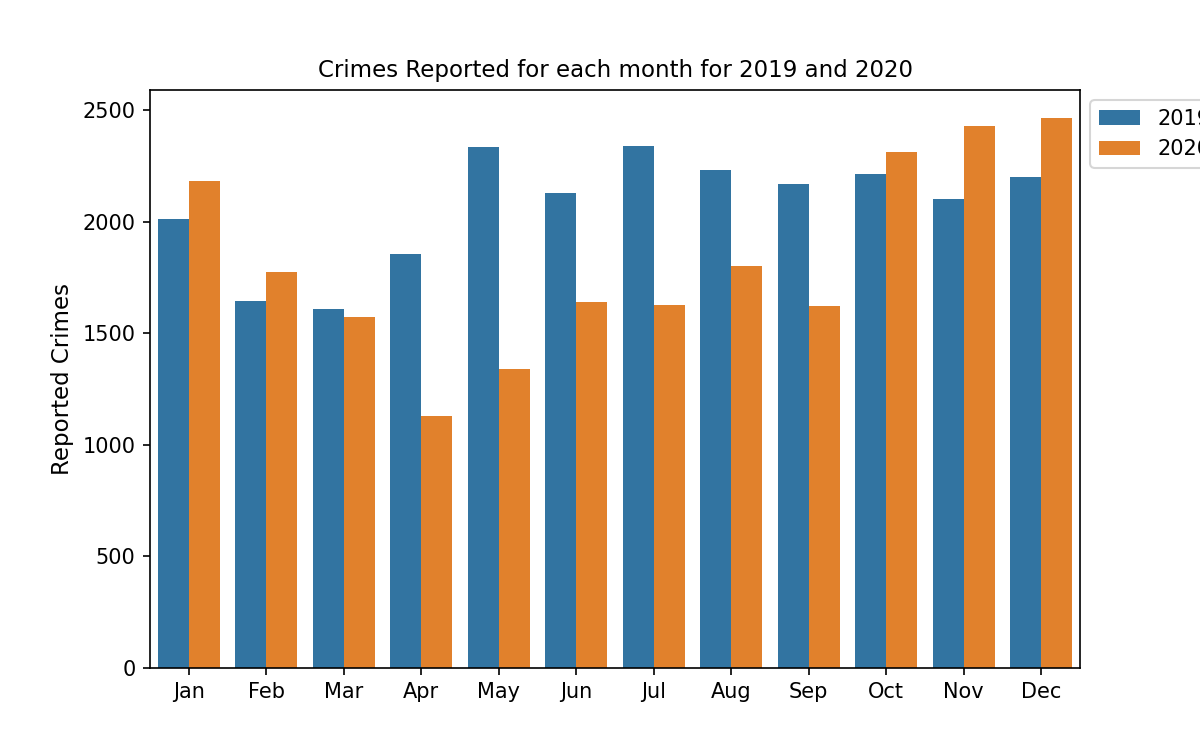

Text(0.5, 0, '')

In [115]:
#Plotting month to month for years 2019-2020

#Set figure size with MatPlotlib
plt.figure(figsize=(8,5))
#Plot with seaborn
sns.barplot(x = 'occur_month', y = 'offense_id', hue = 'occur_year', data = crime_type_month_2019_2020_df)

#Move legend
plt.legend(bbox_to_anchor= (1, 1) );

#Add title and labels for each axis and set font size. 
plt.title("Crimes Reported for each month for 2019 and 2020", fontsize = (11))
plt.ylabel("Reported Crimes", fontsize = (11))
plt.xlabel("")